In [79]:
## Aaron Goldbeck want to add 40 new bike rental stations to the Capital Bikeshare network in Washongton DC.
## Challenges:
## 1) Difficult in meeting the fluctuating bike demand.
## 2) Ridership pattern trend.
## Curiousity
## 1) Best time of the year for Promotion strategy. 
## 2) How different factor affected user riding decision.
## 3) How different timing would effect the operation decision.

# Vishal Khurana ( 40185304)

In [80]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [81]:
data = pd.read_csv('case_study_bike.csv')

In [82]:
data

year  month  day  hour  member  weekend season  temperature  dewpoint  \
0      2016     10    1     0      80        1   fall        18.33      65.0   
1      2016     10    1     1      53        1   fall        17.78      64.0   
2      2016     10    1     2      27        1   fall        17.78      64.0   
3      2016     10    1     3      20        1   fall        17.78      64.0   
4      2016     10    1     4      11        1   fall        17.78      64.0   
...     ...    ...  ...   ...     ...      ...    ...          ...       ...   
17461  2018      9   30    19     416        1   fall        21.67      60.0   
17462  2018      9   30    20     278        1   fall        21.67      61.0   
17463  2018      9   30    21     233        1   fall        21.11      62.0   
17464  2018      9   30    22     148        1   fall        20.00      63.0   
17465  2018      9   30    23      83        1   fall        20.00      62.0   

       humidity  windspeed  windgust  pressure  precip  precipaccum  weather  \
0         100.0        6.0       0.0      30.1     0.0          0.0        3   
1         100.0       10.0       0.0      30.1     0.0          0.0        3   
2         100.0       10.0       0.0      30.1     0.0          0.0        3   
3         100.0       10.0       0.0      30.1     0.1          0.0        3   
4         100.0        9.0       0.0      30.1     0.0          0.0        3   
...         ...        ...       ...       ...     ...          ...      ...   
17461      68.0        5.0       0.0      30.3     0.0          0.0        2   
17462      70.0        3.0       0.0      30.3     0.0          0.0        2   
17463      76.0        6.0       0.0      30.3     0.0          0.0        2   
17464      84.0        8.0       0.0      30.3     0.0          0.0        2   
17465      81.0        7.0       0.0      30.3     0.0          0.0        1   

       rental  
0         103  
1          63  
2          33  
3          23  
4          11  
...       ...  
17461     541  
17462     379  
17463     301  
17464     203  
17465     113  

[17466 rows x 17 columns]

## 1)Preprocessing 

In [83]:
data.describe(include= 'all')

year         month           day          hour        member  \
count   17466.000000  17466.000000  17466.000000  17466.000000  17466.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     2017.246822      6.522902     15.704569     11.518321    317.602657   
std         0.662303      3.451445      8.791244      6.921848    315.397551   
min      2016.000000      1.000000      1.000000      0.000000      0.000000   
25%      2017.000000      4.000000      8.000000      6.000000     63.000000   
50%      2017.000000      7.000000     16.000000     12.000000    244.000000   
75%      2018.000000     10.000000     23.000000     18.000000    455.750000   
max      2018.000000     12.000000     31.000000     23.000000   1639.000000   

             weekend  season   temperature      dewpoint      humidity  \
count   17466.000000   17466  17466.000000  17466.000000  17466.000000   
unique           NaN       4           NaN           NaN           NaN   
top              NaN  spring           NaN           NaN           NaN   
freq             NaN    4407           NaN           NaN           NaN   
mean        0.287759     NaN     15.557475     47.166089     65.172028   
std         0.452731     NaN      9.794618     19.570545     19.549624   
min         0.000000     NaN    -12.780000      0.000000     13.000000   
25%         0.000000     NaN      7.780000     32.000000     49.000000   
50%         0.000000     NaN     16.670000     50.000000     66.000000   
75%         1.000000     NaN     23.890000     64.310000     82.000000   
max         1.000000     NaN     36.110000     80.000000    100.000000   

           windspeed      windgust      pressure        precip   precipaccum  \
count   17466.000000  17466.000000  17466.000000  17466.000000  17466.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        8.811951      3.095630     30.047717      0.003403      0.003845   
std         5.104676      8.664425      0.390741      0.029175      0.065460   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         6.000000      0.000000     29.900000      0.000000      0.000000   
50%         8.000000      0.000000     30.000000      0.000000      0.000000   
75%        12.000000      0.000000     30.200000      0.000000      0.000000   
max        44.000000     59.000000     30.800000      1.320000      4.000000   

             weather        rental  
count   17466.000000  17466.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean        1.774820    420.144910  
std         0.703245    402.473513  
min         1.000000      0.000000  
25%         1.000000     77.000000  
50%         2.000000    315.500000  
75%         2.000000    634.000000  
max         4.000000   2038.000000

In [84]:
data.shape

(17466, 17)

In [85]:
data.columns.to_list()

['year',
 'month',
 'day',
 'hour',
 'member',
 'weekend',
 'season',
 'temperature',
 'dewpoint',
 'humidity',
 'windspeed',
 'windgust',
 'pressure',
 'precip',
 'precipaccum',
 'weather',
 'rental']

In [86]:
data.isnull().sum()

year           0
month          0
day            0
hour           0
member         0
weekend        0
season         0
temperature    0
dewpoint       0
humidity       0
windspeed      0
windgust       0
pressure       0
precip         0
precipaccum    0
weather        0
rental         0
dtype: int64

In [87]:
data.nunique()

year              3
month            12
day              31
hour             24
member         1423
weekend           2
season            4
temperature     490
dewpoint        461
humidity        408
windspeed       286
windgust        191
pressure         86
precip           48
precipaccum      39
weather           4
rental         1659
dtype: int64

In [88]:
data.shape

(17466, 17)

In [89]:
data.drop_duplicates().shape

(17466, 17)

In [90]:
pre_process = data

# 2)Data Cleaning

In [91]:
weather_codes = {1:'fair', 2:'cloudy', 3:'dizzle', 4: 'haze'}
pre_process['weather']= pre_process['weather'].map(weather_codes)

In [92]:
pre_process.weather.value_counts()

cloudy    9209
fair      6306
dizzle    1529
haze       422
Name: weather, dtype: int64

In [93]:
pre_process.head()

year  month  day  hour  member  weekend season  temperature  dewpoint  \
0  2016     10    1     0      80        1   fall        18.33      65.0   
1  2016     10    1     1      53        1   fall        17.78      64.0   
2  2016     10    1     2      27        1   fall        17.78      64.0   
3  2016     10    1     3      20        1   fall        17.78      64.0   
4  2016     10    1     4      11        1   fall        17.78      64.0   

   humidity  windspeed  windgust  pressure  precip  precipaccum weather  \
0     100.0        6.0       0.0      30.1     0.0          0.0  dizzle   
1     100.0       10.0       0.0      30.1     0.0          0.0  dizzle   
2     100.0       10.0       0.0      30.1     0.0          0.0  dizzle   
3     100.0       10.0       0.0      30.1     0.1          0.0  dizzle   
4     100.0        9.0       0.0      30.1     0.0          0.0  dizzle   

   rental  
0     103  
1      63  
2      33  
3      23  
4      11

In [94]:
## As we are seeing that day and weekend are showin the same thing. we are dropping day column
pre_process.drop(['day'], axis =1, inplace = True)

In [95]:
pre_process

year  month  hour  member  weekend season  temperature  dewpoint  \
0      2016     10     0      80        1   fall        18.33      65.0   
1      2016     10     1      53        1   fall        17.78      64.0   
2      2016     10     2      27        1   fall        17.78      64.0   
3      2016     10     3      20        1   fall        17.78      64.0   
4      2016     10     4      11        1   fall        17.78      64.0   
...     ...    ...   ...     ...      ...    ...          ...       ...   
17461  2018      9    19     416        1   fall        21.67      60.0   
17462  2018      9    20     278        1   fall        21.67      61.0   
17463  2018      9    21     233        1   fall        21.11      62.0   
17464  2018      9    22     148        1   fall        20.00      63.0   
17465  2018      9    23      83        1   fall        20.00      62.0   

       humidity  windspeed  windgust  pressure  precip  precipaccum weather  \
0         100.0        6.0       0.0      30.1     0.0          0.0  dizzle   
1         100.0       10.0       0.0      30.1     0.0          0.0  dizzle   
2         100.0       10.0       0.0      30.1     0.0          0.0  dizzle   
3         100.0       10.0       0.0      30.1     0.1          0.0  dizzle   
4         100.0        9.0       0.0      30.1     0.0          0.0  dizzle   
...         ...        ...       ...       ...     ...          ...     ...   
17461      68.0        5.0       0.0      30.3     0.0          0.0  cloudy   
17462      70.0        3.0       0.0      30.3     0.0          0.0  cloudy   
17463      76.0        6.0       0.0      30.3     0.0          0.0  cloudy   
17464      84.0        8.0       0.0      30.3     0.0          0.0  cloudy   
17465      81.0        7.0       0.0      30.3     0.0          0.0    fair   

       rental  
0         103  
1          63  
2          33  
3          23  
4          11  
...       ...  
17461     541  
17462     379  
17463     301  
17464     203  
17465     113  

[17466 rows x 16 columns]

In [96]:
month_codes ={1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7:'Jul', 8: 'Aug', 9:'Sep', 10:'Oct', 11: 'Nov',12: 'Dec'}
pre_process['month'] = pre_process['month'].map(month_codes)

In [97]:
weekend_codes = {1: 'yes', 0: 'no'}
pre_process['weekend'] = pre_process['weekend'].map(weekend_codes)

In [98]:
pre_process.month.value_counts()

Jan    1488
Jul    1487
Oct    1486
Dec    1486
Mar    1486
May    1483
Aug    1451
Nov    1440
Sep    1439
Apr    1438
Jun    1438
Feb    1344
Name: month, dtype: int64

In [99]:
pre_process.year.value_counts()

2017    8741
2018    6518
2016    2207
Name: year, dtype: int64

In [100]:
pre_process

year month  hour  member weekend season  temperature  dewpoint  \
0      2016   Oct     0      80     yes   fall        18.33      65.0   
1      2016   Oct     1      53     yes   fall        17.78      64.0   
2      2016   Oct     2      27     yes   fall        17.78      64.0   
3      2016   Oct     3      20     yes   fall        17.78      64.0   
4      2016   Oct     4      11     yes   fall        17.78      64.0   
...     ...   ...   ...     ...     ...    ...          ...       ...   
17461  2018   Sep    19     416     yes   fall        21.67      60.0   
17462  2018   Sep    20     278     yes   fall        21.67      61.0   
17463  2018   Sep    21     233     yes   fall        21.11      62.0   
17464  2018   Sep    22     148     yes   fall        20.00      63.0   
17465  2018   Sep    23      83     yes   fall        20.00      62.0   

       humidity  windspeed  windgust  pressure  precip  precipaccum weather  \
0         100.0        6.0       0.0      30.1     0.0          0.0  dizzle   
1         100.0       10.0       0.0      30.1     0.0          0.0  dizzle   
2         100.0       10.0       0.0      30.1     0.0          0.0  dizzle   
3         100.0       10.0       0.0      30.1     0.1          0.0  dizzle   
4         100.0        9.0       0.0      30.1     0.0          0.0  dizzle   
...         ...        ...       ...       ...     ...          ...     ...   
17461      68.0        5.0       0.0      30.3     0.0          0.0  cloudy   
17462      70.0        3.0       0.0      30.3     0.0          0.0  cloudy   
17463      76.0        6.0       0.0      30.3     0.0          0.0  cloudy   
17464      84.0        8.0       0.0      30.3     0.0          0.0  cloudy   
17465      81.0        7.0       0.0      30.3     0.0          0.0    fair   

       rental  
0         103  
1          63  
2          33  
3          23  
4          11  
...       ...  
17461     541  
17462     379  
17463     301  
17464     203  
17465     113  

[17466 rows x 16 columns]

In [101]:
data_clean = pre_process

# 3)Dividing column into continuous and categorical column

In [102]:
cat_col = ['hour' ,'month','season', 'weather' ,'weekend', 'year']
cont_col = [  'member', 'temperature', 'dewpoint', 'humidity','windspeed','windgust', 'pressure', 'precip', 
           'precipaccum']
target = ['rental']

In [103]:
len(cat_col) + len(cont_col) + len(target)

16

# 4) Univariate Analysis

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


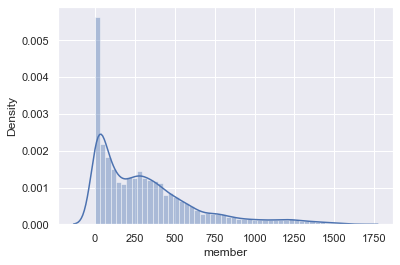

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


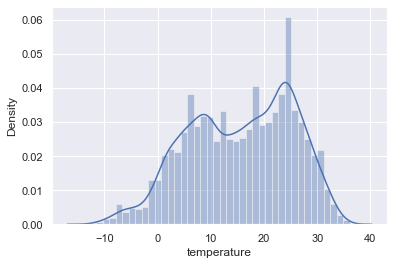

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


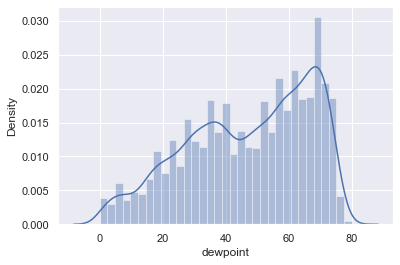

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


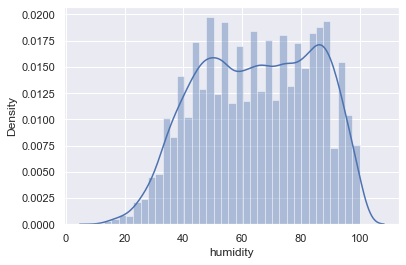

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


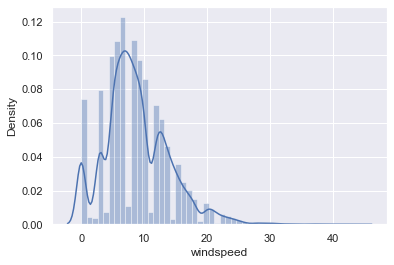

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


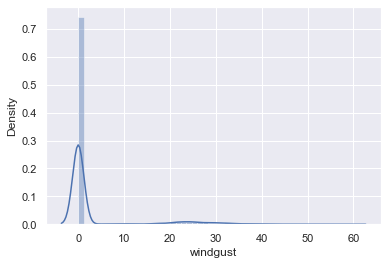

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


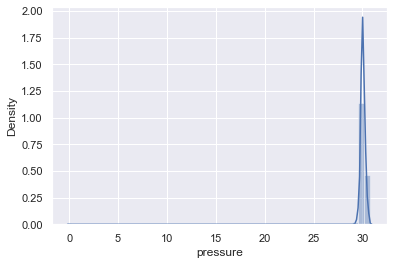

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


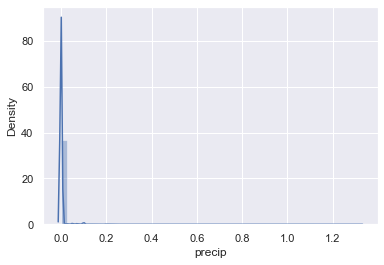

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


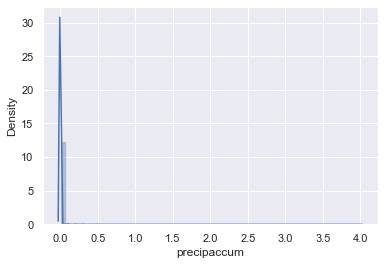

In [104]:
for i in cont_col:
    sns.distplot(data_clean[i])
    plt.show()

In [105]:
## Findings:
## 1) On weekends days number of bike are rented more than weekdays.
## 2) There is not much variation in wind gust,precipaccum,precip,pressure. So, we can drop them.
## 3) 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


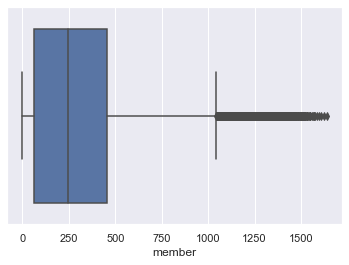

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


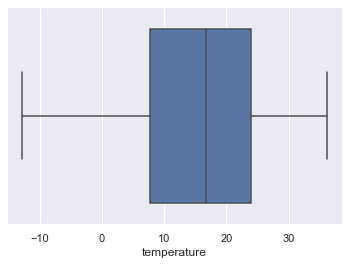

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


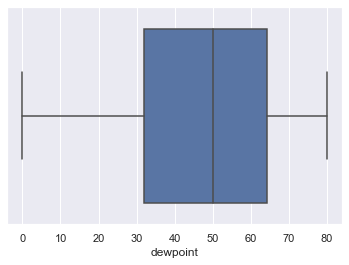

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


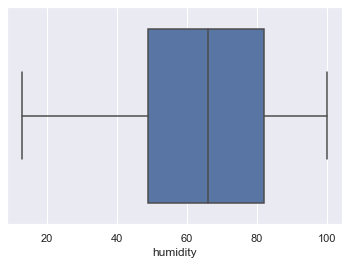

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


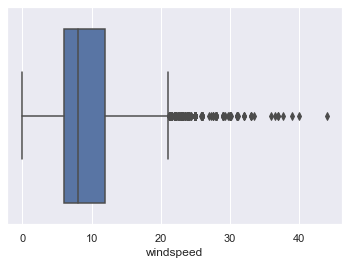

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


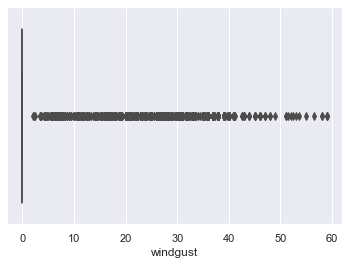

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


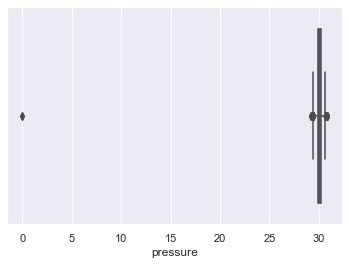

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


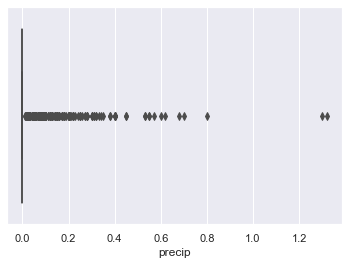

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


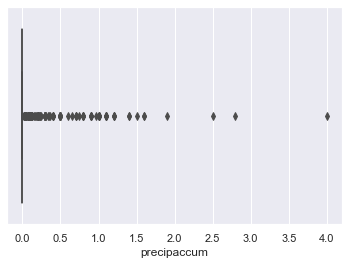

In [106]:
for i in cont_col:
    sns.boxplot(data_clean[i])
    plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


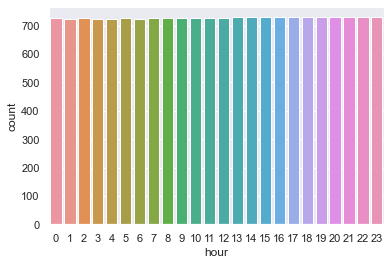

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


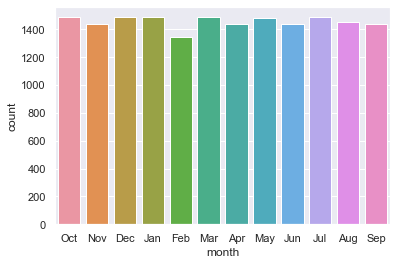

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


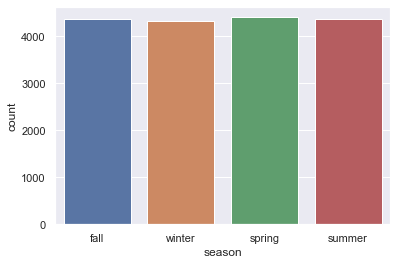

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


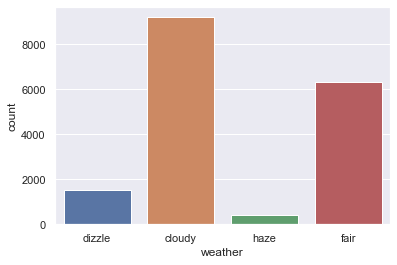

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


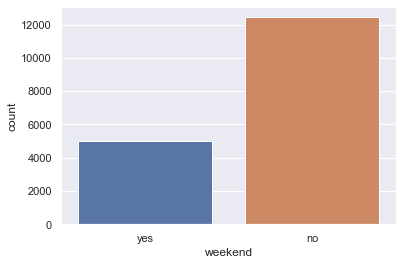

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


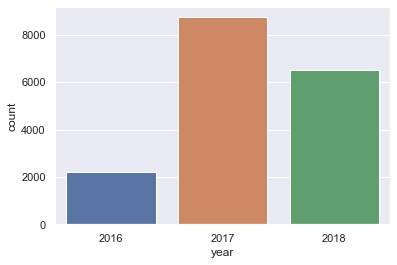

In [107]:
for i in cat_col:
    sns.countplot(data_clean[i])
    plt.show()

In [108]:
for i in cat_col:
    print(data_clean[i].value_counts())
    print('~~~~~~~~~~'*10,'\n\n')

23    730
22    730
21    730
20    730
19    730
18    730
17    730
16    730
13    729
15    729
14    729
0     728
10    728
9     728
12    728
11    727
8     726
7     726
5     726
2     726
6     725
4     725
3     724
1     722
Name: hour, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 


Jan    1488
Jul    1487
Oct    1486
Dec    1486
Mar    1486
May    1483
Aug    1451
Nov    1440
Sep    1439
Apr    1438
Jun    1438
Feb    1344
Name: month, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 


spring    4407
summer    4376
fall      4365
winter    4318
Name: season, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 


cloudy    9209
fair      6306
dizzle    1529
haze       422
Name: weather, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# 5) Bivariate Analysis

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


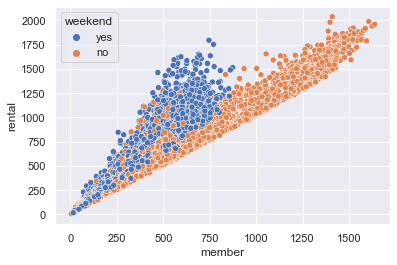

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


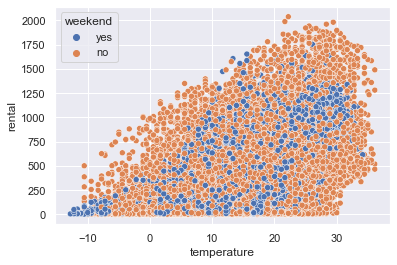

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


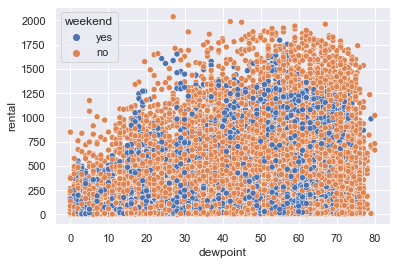

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


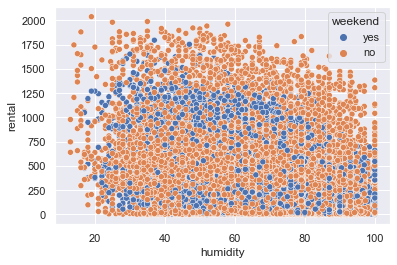

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


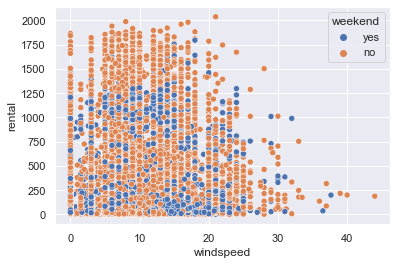

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


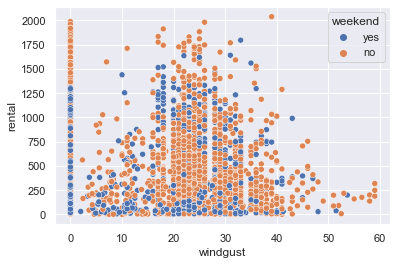

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


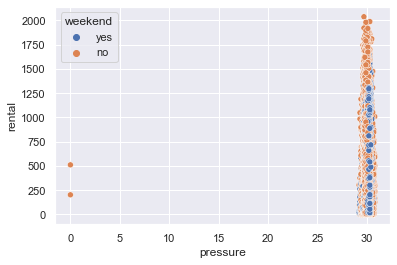

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


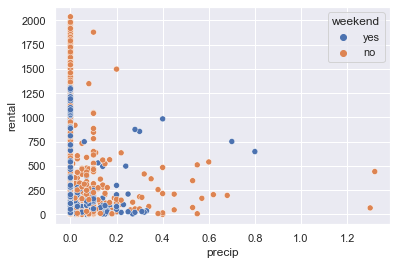

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


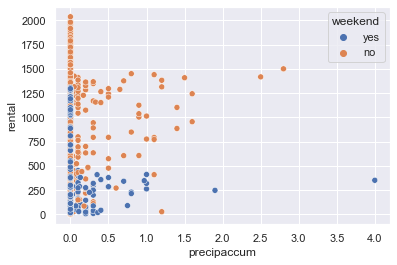

In [109]:
# Plotting scatter plot between rental and continous column
for i in cont_col:
    sns.scatterplot(data_clean[i], data_clean['rental'], hue= data_clean['weekend'] )
    plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


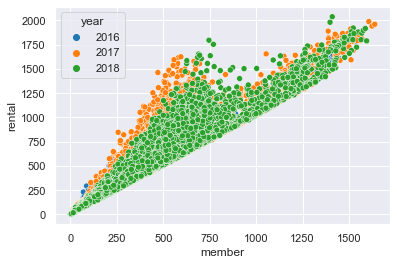

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


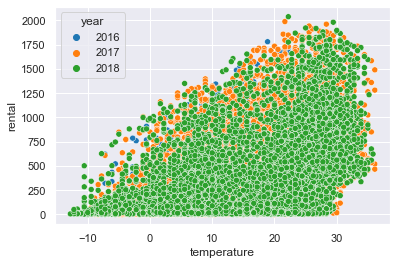

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


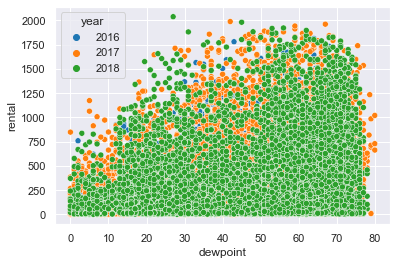

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


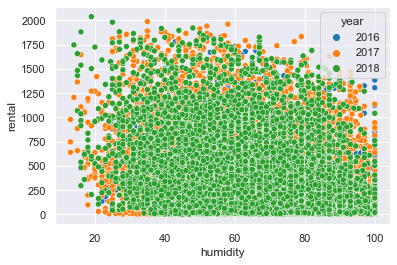

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


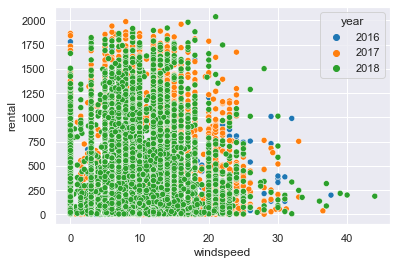

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


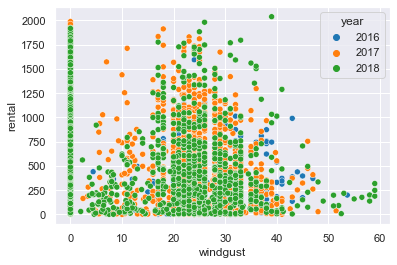

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


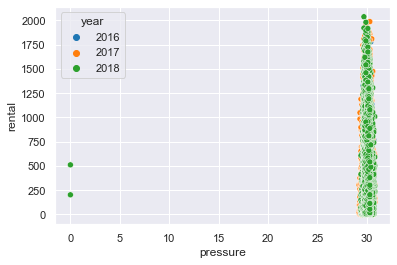

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


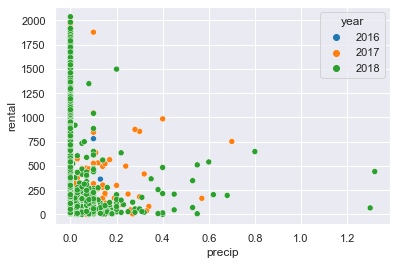

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


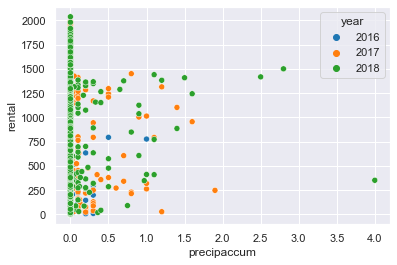

In [110]:
for i in cont_col:
    sns.scatterplot(data_clean[i], data_clean['rental'], hue =data_clean['year'], palette = 'tab10')
    plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


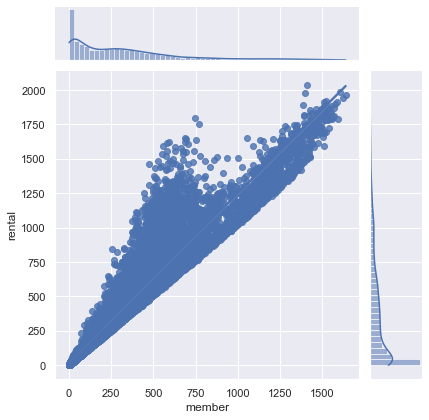

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


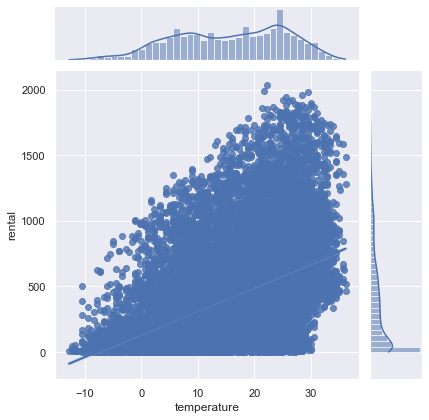

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


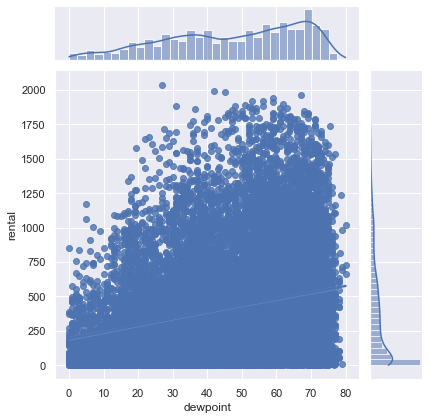

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


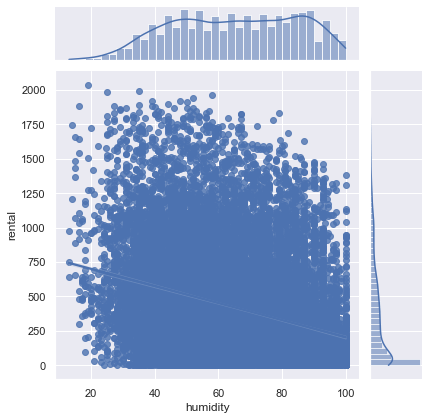

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


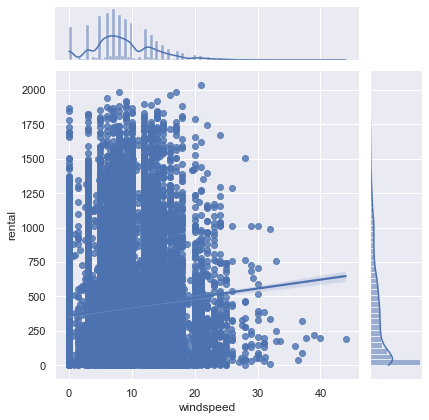

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


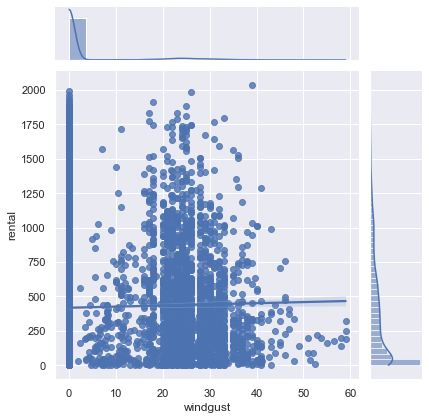

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


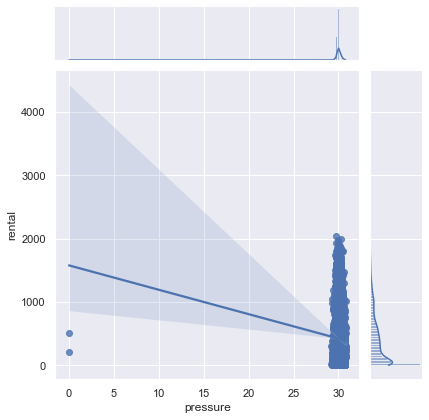

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


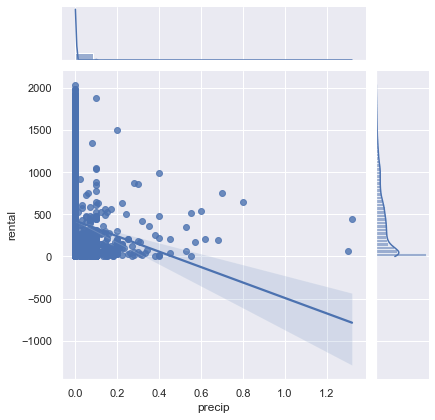

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


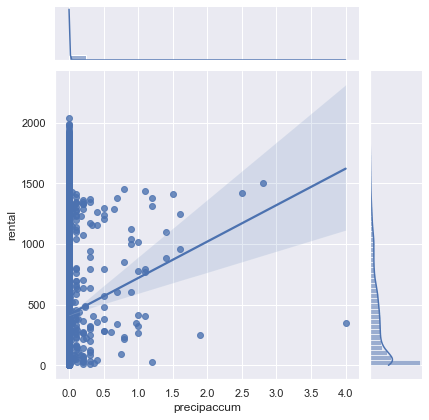

In [111]:
for i in cont_col:
    sns.jointplot(data_clean[i], data_clean['rental'], kind = 'reg')
    plt.show()

There is a positive linear distribution for precipaccum, windgust, windspeed, dewpoint, tempreature, member, hour and negative linear distribution for precip, humidity.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


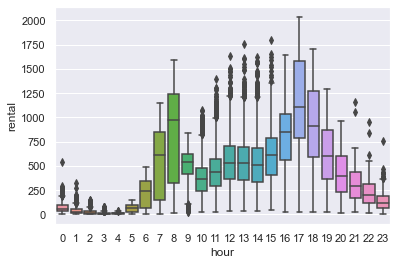

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


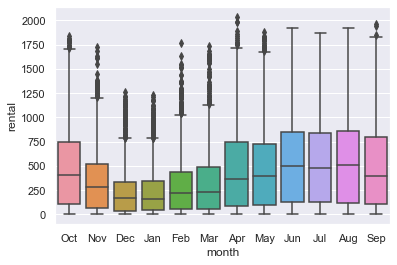

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


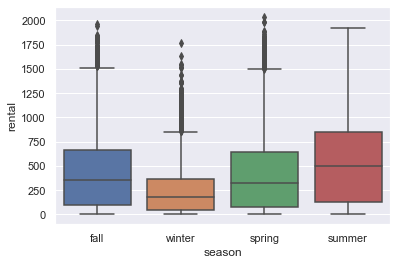

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


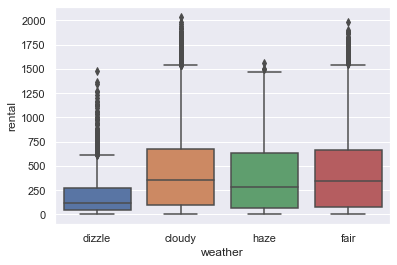

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


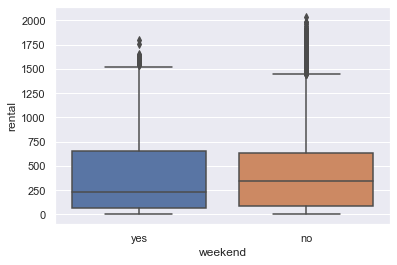

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


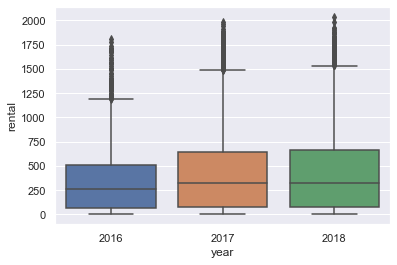

In [112]:
for i in cat_col:
    sns.boxplot(data_clean[i], data_clean['rental'])
    plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


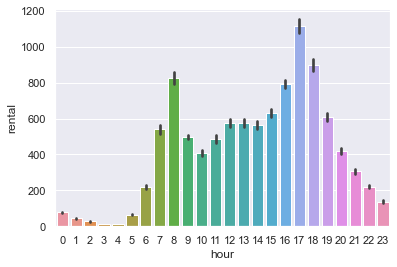

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


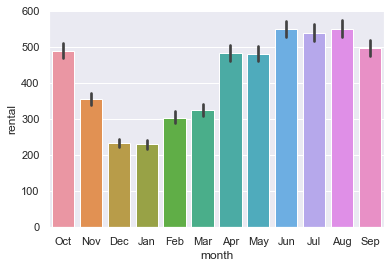

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


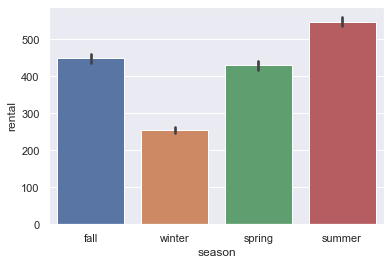

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


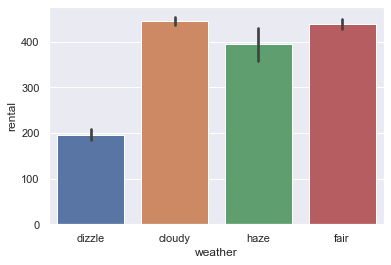

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


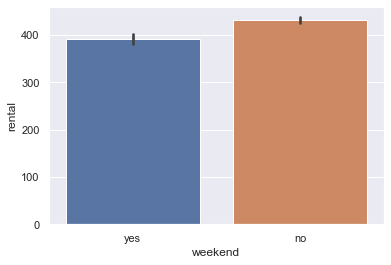

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


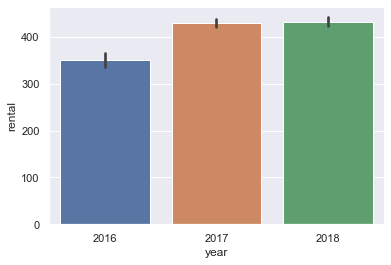

In [113]:
for i in cat_col:
    sns.barplot( data_clean[i], data_clean['rental'])
    plt.show()

# 6) Plotting Heatmaps

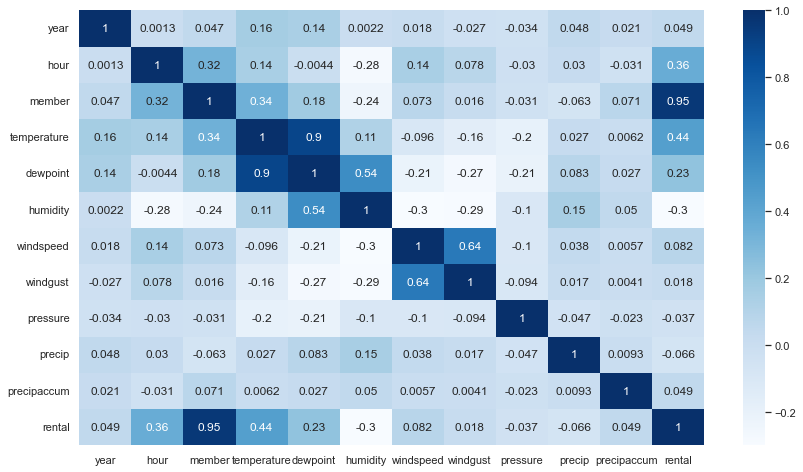

In [114]:
plt.figure(figsize = (14,8))
sns.heatmap(data_clean.corr(), annot= True, cmap='Blues')
plt.show()

In [115]:
## 1) Dewpoint and tempreature  ,humidity and dewpoint, windgust and windspeed ,windspeed and windgust are highly correlated. 
correlation = data_clean.corr()
print(correlation['rental'].sort_values(ascending= False),'\n')

rental         1.000000
member         0.954563
temperature    0.436376
hour           0.363905
dewpoint       0.231299
windspeed      0.082088
year           0.049387
precipaccum    0.048886
windgust       0.017696
pressure      -0.037346
precip        -0.066353
humidity      -0.300233
Name: rental, dtype: float64 



In [116]:
## We will drop dewpoint, windgust. 
data_new = data_clean
data_new = data_new.drop(['dewpoint'], axis = 1)
data_new = data_new.drop(['windgust'], axis = 1)


In [117]:
data_new

year month  hour  member weekend season  temperature  humidity  \
0      2016   Oct     0      80     yes   fall        18.33     100.0   
1      2016   Oct     1      53     yes   fall        17.78     100.0   
2      2016   Oct     2      27     yes   fall        17.78     100.0   
3      2016   Oct     3      20     yes   fall        17.78     100.0   
4      2016   Oct     4      11     yes   fall        17.78     100.0   
...     ...   ...   ...     ...     ...    ...          ...       ...   
17461  2018   Sep    19     416     yes   fall        21.67      68.0   
17462  2018   Sep    20     278     yes   fall        21.67      70.0   
17463  2018   Sep    21     233     yes   fall        21.11      76.0   
17464  2018   Sep    22     148     yes   fall        20.00      84.0   
17465  2018   Sep    23      83     yes   fall        20.00      81.0   

       windspeed  pressure  precip  precipaccum weather  rental  
0            6.0      30.1     0.0          0.0  dizzle     103  
1           10.0      30.1     0.0          0.0  dizzle      63  
2           10.0      30.1     0.0          0.0  dizzle      33  
3           10.0      30.1     0.1          0.0  dizzle      23  
4            9.0      30.1     0.0          0.0  dizzle      11  
...          ...       ...     ...          ...     ...     ...  
17461        5.0      30.3     0.0          0.0  cloudy     541  
17462        3.0      30.3     0.0          0.0  cloudy     379  
17463        6.0      30.3     0.0          0.0  cloudy     301  
17464        8.0      30.3     0.0          0.0  cloudy     203  
17465        7.0      30.3     0.0          0.0    fair     113  

[17466 rows x 14 columns]

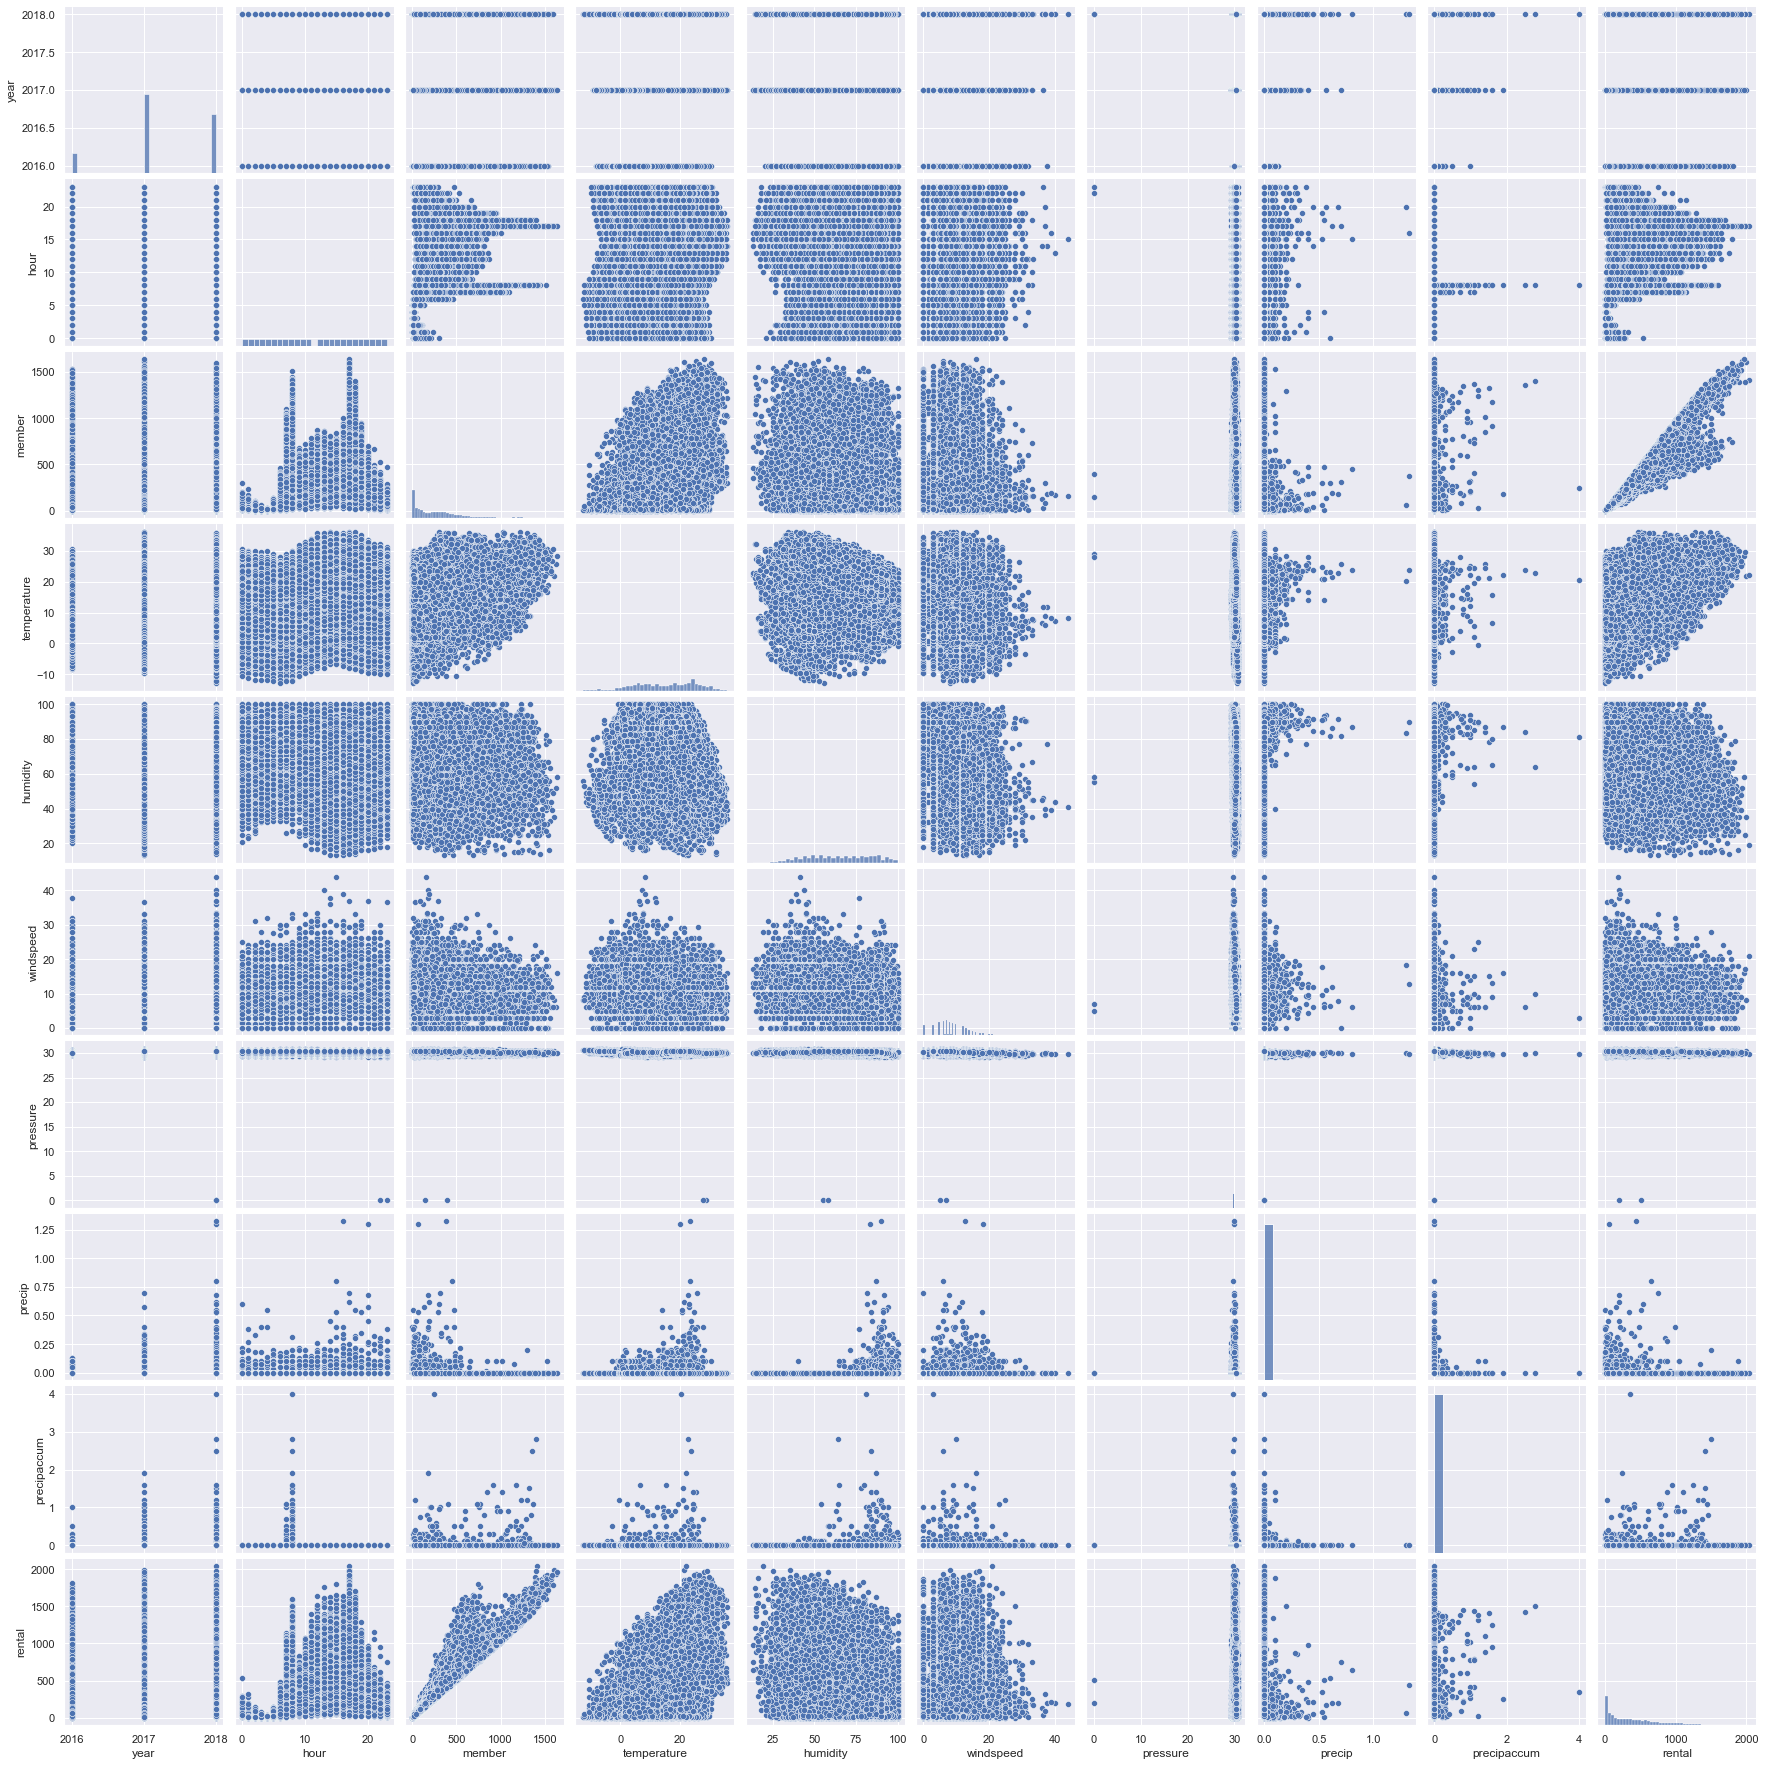

In [118]:
## Plotting pairplot

sns.pairplot(data_new)
plt.show()

# 7) Preprocessing Steps

In [119]:
data_new.head()

year month  hour  member weekend season  temperature  humidity  windspeed  \
0  2016   Oct     0      80     yes   fall        18.33     100.0        6.0   
1  2016   Oct     1      53     yes   fall        17.78     100.0       10.0   
2  2016   Oct     2      27     yes   fall        17.78     100.0       10.0   
3  2016   Oct     3      20     yes   fall        17.78     100.0       10.0   
4  2016   Oct     4      11     yes   fall        17.78     100.0        9.0   

   pressure  precip  precipaccum weather  rental  
0      30.1     0.0          0.0  dizzle     103  
1      30.1     0.0          0.0  dizzle      63  
2      30.1     0.0          0.0  dizzle      33  
3      30.1     0.1          0.0  dizzle      23  
4      30.1     0.0          0.0  dizzle      11

In [120]:
weekend_code = {'yes': 1, 'no': 0}
data_new['weekend'] = data_new['weekend'].map(weekend_code)

In [121]:
data_new['weekend'].value_counts()

0    12440
1     5026
Name: weekend, dtype: int64

In [122]:
## Column on which dummy variables will be made

cat_col = ['year', 'month', 'weekend', 'season', 'weather']
data_new[cat_col].nunique()

year        3
month      12
weekend     2
season      4
weather     4
dtype: int64

# 8) Dummy Variable Creation

In [123]:
dummy = pd.get_dummies(data_clean[['month', 'season', 'weather']], drop_first = True)


In [124]:
dummy

month_Aug  month_Dec  month_Feb  month_Jan  month_Jul  month_Jun  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
17461          0          0          0          0          0          0   
17462          0          0          0          0          0          0   
17463          0          0          0          0          0          0   
17464          0          0          0          0          0          0   
17465          0          0          0          0          0          0   

       month_Mar  month_May  month_Nov  month_Oct  month_Sep  season_spring  \
0              0          0          0          1          0              0   
1              0          0          0          1          0              0   
2              0          0          0          1          0              0   
3              0          0          0          1          0              0   
4              0          0          0          1          0              0   
...          ...        ...        ...        ...        ...            ...   
17461          0          0          0          0          1              0   
17462          0          0          0          0          1              0   
17463          0          0          0          0          1              0   
17464          0          0          0          0          1              0   
17465          0          0          0          0          1              0   

       season_summer  season_winter  weather_dizzle  weather_fair  \
0                  0              0               1             0   
1                  0              0               1             0   
2                  0              0               1             0   
3                  0              0               1             0   
4                  0              0               1             0   
...              ...            ...             ...           ...   
17461              0              0               0             0   
17462              0              0               0             0   
17463              0              0               0             0   
17464              0              0               0             0   
17465              0              0               0             1   

       weather_haze  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
17461             0  
17462             0  
17463             0  
17464             0  
17465             0  

[17466 rows x 17 columns]

In [125]:
data_new = pd.concat([data_new, dummy], axis =1)

In [126]:
data_new.head()

year month  hour  member  weekend season  temperature  humidity  windspeed  \
0  2016   Oct     0      80        1   fall        18.33     100.0        6.0   
1  2016   Oct     1      53        1   fall        17.78     100.0       10.0   
2  2016   Oct     2      27        1   fall        17.78     100.0       10.0   
3  2016   Oct     3      20        1   fall        17.78     100.0       10.0   
4  2016   Oct     4      11        1   fall        17.78     100.0        9.0   

   pressure  ...  month_May  month_Nov month_Oct  month_Sep  season_spring  \
0      30.1  ...          0          0         1          0              0   
1      30.1  ...          0          0         1          0              0   
2      30.1  ...          0          0         1          0              0   
3      30.1  ...          0          0         1          0              0   
4      30.1  ...          0          0         1          0              0   

   season_summer  season_winter  weather_dizzle  weather_fair  weather_haze  
0              0              0               1             0             0  
1              0              0               1             0             0  
2              0              0               1             0             0  
3              0              0               1             0             0  
4              0              0               1             0             0  

[5 rows x 31 columns]

In [127]:
data_with_dummy = data_new

In [128]:
data_with_dummy = data_with_dummy.drop(['month', 'season', 'weather'], axis = 1)

In [129]:
data_with_dummy

year  hour  member  weekend  temperature  humidity  windspeed  \
0      2016     0      80        1        18.33     100.0        6.0   
1      2016     1      53        1        17.78     100.0       10.0   
2      2016     2      27        1        17.78     100.0       10.0   
3      2016     3      20        1        17.78     100.0       10.0   
4      2016     4      11        1        17.78     100.0        9.0   
...     ...   ...     ...      ...          ...       ...        ...   
17461  2018    19     416        1        21.67      68.0        5.0   
17462  2018    20     278        1        21.67      70.0        3.0   
17463  2018    21     233        1        21.11      76.0        6.0   
17464  2018    22     148        1        20.00      84.0        8.0   
17465  2018    23      83        1        20.00      81.0        7.0   

       pressure  precip  precipaccum  ...  month_May  month_Nov  month_Oct  \
0          30.1     0.0          0.0  ...          0          0          1   
1          30.1     0.0          0.0  ...          0          0          1   
2          30.1     0.0          0.0  ...          0          0          1   
3          30.1     0.1          0.0  ...          0          0          1   
4          30.1     0.0          0.0  ...          0          0          1   
...         ...     ...          ...  ...        ...        ...        ...   
17461      30.3     0.0          0.0  ...          0          0          0   
17462      30.3     0.0          0.0  ...          0          0          0   
17463      30.3     0.0          0.0  ...          0          0          0   
17464      30.3     0.0          0.0  ...          0          0          0   
17465      30.3     0.0          0.0  ...          0          0          0   

       month_Sep  season_spring  season_summer  season_winter  weather_dizzle  \
0              0              0              0              0               1   
1              0              0              0              0               1   
2              0              0              0              0               1   
3              0              0              0              0               1   
4              0              0              0              0               1   
...          ...            ...            ...            ...             ...   
17461          1              0              0              0               0   
17462          1              0              0              0               0   
17463          1              0              0              0               0   
17464          1              0              0              0               0   
17465          1              0              0              0               0   

       weather_fair  weather_haze  
0                 0             0  
1                 0             0  
2                 0             0  
3                 0             0  
4                 0             0  
...             ...           ...  
17461             0             0  
17462             0             0  
17463             0             0  
17464             0             0  
17465             1             0  

[17466 rows x 28 columns]

# 9) Splitting Data into Training and Testing Sets

In [130]:
targets = data_with_dummy['rental']
inputs = data_with_dummy.drop(['rental'], axis = 1)

In [131]:
data_final = data_with_dummy
from sklearn.model_selection import train_test_split
data_final_train, data_final_test = train_test_split(data_final, train_size =0.7, test_size = 0.3, random_state =100)

In [132]:
##Scailing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [133]:
data_final.head()

year  hour  member  weekend  temperature  humidity  windspeed  pressure  \
0  2016     0      80        1        18.33     100.0        6.0      30.1   
1  2016     1      53        1        17.78     100.0       10.0      30.1   
2  2016     2      27        1        17.78     100.0       10.0      30.1   
3  2016     3      20        1        17.78     100.0       10.0      30.1   
4  2016     4      11        1        17.78     100.0        9.0      30.1   

   precip  precipaccum  ...  month_May  month_Nov  month_Oct  month_Sep  \
0     0.0          0.0  ...          0          0          1          0   
1     0.0          0.0  ...          0          0          1          0   
2     0.0          0.0  ...          0          0          1          0   
3     0.1          0.0  ...          0          0          1          0   
4     0.0          0.0  ...          0          0          1          0   

   season_spring  season_summer  season_winter  weather_dizzle  weather_fair  \
0              0              0              0               1             0   
1              0              0              0               1             0   
2              0              0              0               1             0   
3              0              0              0               1             0   
4              0              0              0               1             0   

   weather_haze  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 28 columns]

In [134]:
## Applying scaler() to all the columns except dummy variables year and weekend.

num_vars = ['member', 'temperature', 'humidity', 'windspeed', 'pressure','precip', 'precipaccum','rental' ]
data_final_train[num_vars] = scaler.fit_transform(data_final_train[num_vars])
data_final_train.head()

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


year  hour    member  weekend  temperature  humidity  windspeed  \
7431   2017    19  0.274220        1     1.135594 -0.775998  -1.144041   
14744  2018    12  0.463376        0     0.965167  0.041189   0.236770   
13     2016    13 -0.104092        1     0.341628  1.614273  -0.157747   
2623   2017     8  1.784314        0    -0.792172  1.777711  -0.749523   
5571   2017     5 -0.964751        1     0.001794 -0.724924  -0.355006   

       pressure    precip  precipaccum  ...  month_May  month_Nov  month_Oct  \
7431   0.147127 -0.117449    -0.062856  ...          0          0          0   
14744  0.431689 -0.117449    -0.062856  ...          0          0          0   
13     0.147127 -0.117449    -0.062856  ...          0          0          1   
2623  -0.421997 -0.117449    -0.062856  ...          0          0          0   
5571   0.716251 -0.117449    -0.062856  ...          1          0          0   

       month_Sep  season_spring  season_summer  season_winter  weather_dizzle  \
7431           0              0              1              0               0   
14744          0              0              1              0               0   
13             0              0              0              0               0   
2623           0              0              0              1               0   
5571           0              1              0              0               0   

       weather_fair  weather_haze  
7431              0             0  
14744             0             0  
13                0             1  
2623              0             0  
5571              0             0  

[5 rows x 28 columns]

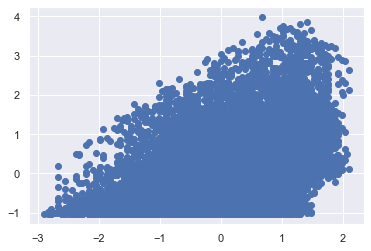

In [135]:
plt.scatter('temperature', 'rental', data= data_final_train)

# 10) Dividing into X and Y sets for the model building

In [136]:
y_train = data_final_train.pop('rental')
X_train = data_final_train



In [137]:
y_train

7431     1.002538
14744    0.797512
13      -0.015182
2623     1.237207
5571    -0.998320
           ...   
16304   -0.608029
79       1.471876
12119   -0.511691
14147    0.841976
5640    -1.030432
Name: rental, Length: 12226, dtype: float64

In [138]:
print(X_train.columns.tolist())

['year', 'hour', 'member', 'weekend', 'temperature', 'humidity', 'windspeed', 'pressure', 'precip', 'precipaccum', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'season_spring', 'season_summer', 'season_winter', 'weather_dizzle', 'weather_fair', 'weather_haze']


In [139]:
X_train.head()

year  hour    member  weekend  temperature  humidity  windspeed  \
7431   2017    19  0.274220        1     1.135594 -0.775998  -1.144041   
14744  2018    12  0.463376        0     0.965167  0.041189   0.236770   
13     2016    13 -0.104092        1     0.341628  1.614273  -0.157747   
2623   2017     8  1.784314        0    -0.792172  1.777711  -0.749523   
5571   2017     5 -0.964751        1     0.001794 -0.724924  -0.355006   

       pressure    precip  precipaccum  ...  month_May  month_Nov  month_Oct  \
7431   0.147127 -0.117449    -0.062856  ...          0          0          0   
14744  0.431689 -0.117449    -0.062856  ...          0          0          0   
13     0.147127 -0.117449    -0.062856  ...          0          0          1   
2623  -0.421997 -0.117449    -0.062856  ...          0          0          0   
5571   0.716251 -0.117449    -0.062856  ...          1          0          0   

       month_Sep  season_spring  season_summer  season_winter  weather_dizzle  \
7431           0              0              1              0               0   
14744          0              0              1              0               0   
13             0              0              0              0               0   
2623           0              0              0              1               0   
5571           0              1              0              0               0   

       weather_fair  weather_haze  
7431              0             0  
14744             0             0  
13                0             1  
2623              0             0  
5571              0             0  

[5 rows x 27 columns]

# 11) Building our Model

In [140]:
y_train_ = y_train
X_train_ = X_train

In [141]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [142]:
y_hat = reg.predict(X_train)
## The simplest way to check the final result is to plot the predicted values against the observed values.y
y_hat

array([ 0.68615546,  0.44935067,  0.03902501, ..., -0.35487552,
        0.49361771, -1.07457293])

In [143]:
y_train

7431     1.002538
14744    0.797512
13      -0.015182
2623     1.237207
5571    -0.998320
           ...   
16304   -0.608029
79       1.471876
12119   -0.511691
14147    0.841976
5640    -1.030432
Name: rental, Length: 12226, dtype: float64

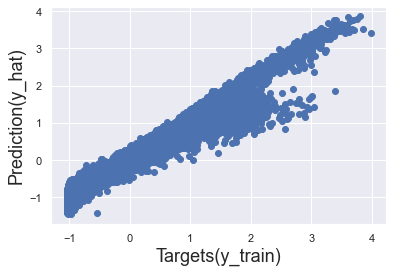

In [144]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)', size =18)
plt.ylabel('Prediction(y_hat)', size = 18)

plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

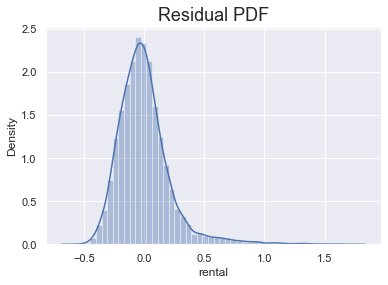

In [145]:
## It shows Linear variation.
## Residual = Difference between target and the prediction
sns.distplot(y_train-y_hat)
plt.title('Residual PDF', size =18)

In [146]:
## There are certain observation for which the model prediction under estimate the target.

In [147]:
reg.score(X_train, y_train)

0.9505990470483594

# The R squared is 95%. Therefore the model is explaining the 95% variability of the data.

# 12) Finding the weights and bias

In [148]:
reg.intercept_
# bias

75.20521322346394

In [149]:
reg.coef_
# weights

array([-0.03733308,  0.00314271,  0.88943581,  0.24347615,  0.19805071,
       -0.09571844, -0.0057957 ,  0.01263234,  0.00166308, -0.00913635,
       -0.02366592, -0.01800921,  0.00716421,  0.05468789, -0.01652215,
       -0.00952337, -0.00776838, -0.07716665,  0.00276835, -0.01292588,
       -0.08331317,  0.09933925, -0.04971144,  0.04384289,  0.00149629,
       -0.02867723,  0.00218008])

In [150]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

Features   weights
0             year -0.037333
1             hour  0.003143
2           member  0.889436
3          weekend  0.243476
4      temperature  0.198051
5         humidity -0.095718
6        windspeed -0.005796
7         pressure  0.012632
8           precip  0.001663
9      precipaccum -0.009136
10       month_Aug -0.023666
11       month_Dec -0.018009
12       month_Feb  0.007164
13       month_Jan  0.054688
14       month_Jul -0.016522
15       month_Jun -0.009523
16       month_Mar -0.007768
17       month_May -0.077167
18       month_Nov  0.002768
19       month_Oct -0.012926
20       month_Sep -0.083313
21   season_spring  0.099339
22   season_summer -0.049711
23   season_winter  0.043843
24  weather_dizzle  0.001496
25    weather_fair -0.028677
26    weather_haze  0.002180

In [151]:
## A positive weight shows that as a feature increases in value, so do the rental.
## A negative weight shows that as a feature increase in value, rental decreases. 

# 13) Testing

In [152]:
y_test = data_final_test.pop('rental')
X_test = data_final_test

In [153]:
y_hat_test = reg.predict(X_test)

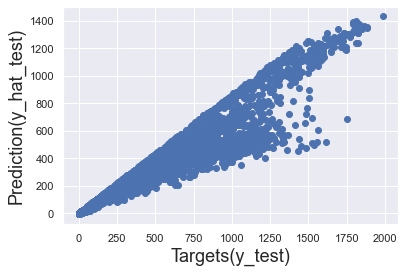

In [154]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets(y_test)', size =18)
plt.ylabel('Prediction(y_hat_test)', size = 18)

plt.show()


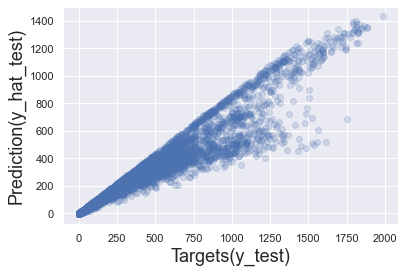

In [155]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Targets(y_test)', size =18)
plt.ylabel('Prediction(y_hat_test)', size = 18)

plt.show()


In [156]:
reg.score(X_test, y_test)

0.727988425357246

# Assumptions:

# 1) Linearity

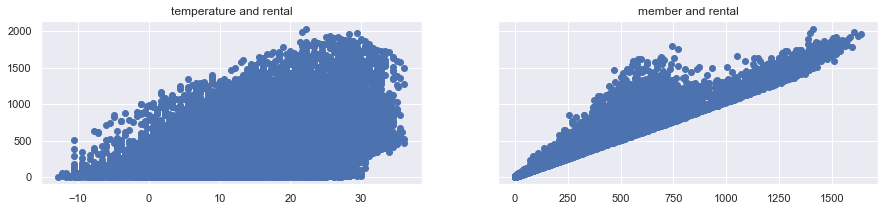

In [183]:
f, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize=(15,3))

ax1.scatter(data_clean['temperature'],data_clean['rental'] )
ax1.set_title('temperature and rental')

ax2.scatter(data_clean['member'], data_clean['rental'])
ax2.set_title('member and rental')



plt.show()

In [166]:
print(X_train.columns.tolist())

['year', 'hour', 'member', 'weekend', 'temperature', 'humidity', 'windspeed', 'pressure', 'precip', 'precipaccum', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'season_spring', 'season_summer', 'season_winter', 'weather_dizzle', 'weather_fair', 'weather_haze']


In [179]:
X_train_new = X_train[['year', 'hour','member', 'weekend', 'temperature', 'humidity', 'windspeed', 'pressure', 'precip', 'precipaccum']]


In [180]:
X_train_new

year  hour    member  weekend  temperature  humidity  windspeed  \
7431   2017    19  0.274220        1     1.135594 -0.775998  -1.144041   
14744  2018    12  0.463376        0     0.965167  0.041189   0.236770   
13     2016    13 -0.104092        1     0.341628  1.614273  -0.157747   
2623   2017     8  1.784314        0    -0.792172  1.777711  -0.749523   
5571   2017     5 -0.964751        1     0.001794 -0.724924  -0.355006   
...     ...   ...       ...      ...          ...       ...        ...   
16304  2018    18 -0.608508        1     0.851889  0.790447   0.171675   
79     2016     7  2.068048        0    -0.055355  1.266969  -0.552265   
12119  2018    19 -0.513930        1    -0.792172 -0.214182  -0.749523   
14147  2018    15  0.444460        0     0.908018  0.194411  -0.355006   
5640   2017     2 -0.993124        0     0.057923  1.266969   0.631287   

       pressure    precip  precipaccum  
7431   0.147127 -0.117449    -0.062856  
14744  0.431689 -0.117449    -0.062856  
13     0.147127 -0.117449    -0.062856  
2623  -0.421997 -0.117449    -0.062856  
5571   0.716251 -0.117449    -0.062856  
...         ...       ...          ...  
16304 -0.137435  3.400271    -0.062856  
79     0.431689 -0.117449    -0.062856  
12119  1.000813 -0.117449    -0.062856  
14147 -0.137435 -0.117449    -0.062856  
5640  -0.991121 -0.117449    -0.062856  

[12226 rows x 10 columns]

In [181]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0         year  4.64
1         hour  4.53
3      weekend  1.46
2       member  1.36
5     humidity  1.31
4  temperature  1.26
6    windspeed  1.15
7     pressure  1.09
8       precip  1.04
9  precipaccum  1.02